# Shallow Water Equation Solver

# Introduction:

The **shallow-water equations** are important for the study of the dynamics of large-scale atmospheric flows, as well as for the development of new numerical schemes that are applied to more complex models.

A suite of seven test cases is proposed for the evaluation of numerical methods intended for the solution of the shallow water equations in spherical geometry. The shallow water equations exhibit the major difficulties associated with the horizontal dynamical aspects of atmospheric modeling on the spherical earth.

Their widespread use has revealed a number of serious problems that severely limit their practical utility.

The first test consists of advection of a structure of compact support by a specified wind field corresponding to solid body rotation whose axis is not necessarily coincident with that of the rotation of the earth. As such this case deals with only a subset of the shallow water equations, namely the continuity equation, but concentrates on a scheme's ability to deal with the poles of the spherical coordinate system.

The second and third cases present steady state, nonlinear zonal geostrophic flow. There are a global form with the wind corresponding to solid body rotation and a local form where the wind field has compact support.

One case uses an analytic forcing function to drive a low around the sphere. The case mimics the more complicated local structures observed in the atmosphere.

Another case consists of zonal flow impinging on an isolated mountain in which a downstream wavetrain is set up.

A Rossby-Haurwitz wave case is also included. Analytic solutions for the Rossby-Haurwitz wave in the shallow water context are not known but this wave has become a standard test case in meteorology.

# What are the Problems?

Test cases 1–4 have simple analytical solutions and are useful for debugging and establishing some key characteristics of the numerical scheme being tested. However, the flows associated with these tests are completely idealized and thus largely unrepresentative of typical atmospheric conditions.

Test case 5 involves flow over an isolated mountain, but the mountain topography as defined in W92 is not a differentiable function: this is obviously problematic.

Test case 6, an initial wavenumber-4 Rossby–Haurwitz wave, has also turned out to be much more subtle than originally suspected. As Thuburn and Li (2000) have recently shown, this initial condition generates complex small-scale features in the vorticity field as a consequence of a triad instability of the initial flow (Baines, 1976). Surprisingly enough, truncation errors are sufficient to instigate the instability.

Test case 7 requires the downloading of the initial fields, and involves some cumbersome steps (e.g. interpolations) that make it somewhat impractical.

A new test case that specifically addresses the difficulties we have just discussed. The new test case uses simple, analytical functions for the initial condition, and is thus easily implemented. In addition, from these simple initial conditions, the new test case is able to generate complex dynamics that are representative of atmospheric flows. The new test case is nothing but a barotropically unstable zonal flow, to which a simple perturbation is added to induce the instability.

# Equations:

**The shallow-water equations:**

In vector form, the viscous shallow-water equations can be written as:

$ \frac{dv}{dt} = -f(k\times V) - g(\bigtriangledown h) + \nu(\bigtriangledown ^{2}.V)$ 

$ \frac{dh}{dt} = -h(\bigtriangledown V) + \nu(\bigtriangledown ^{2}.h)$ 

where $\frac{d}{dt}$ designates material derivative, the prognostic variables are V = iu + jv, the velocity vector tangent to the spherical surface, and h is the thickness of the fluid layer. The other notation is standard: $f = (2 \omega sin\phi)$ is the Coriolis parameter ($\phi$ denotes latitude), $\omega$ is the angular velocity of the Earth, g is the acceleration due to gravity, and $\nu$ is the diffusion coefficient. The numerical values for the constants we have adopted for this test case are $\omega = 7.292\times 10^{−5} s^{−1}$ and $g = 9.80616 ms^{−1}$. Ideally, one might want to use inviscid equations for a test case.

**Zonal jet:**

The initial condition for the new test case consists of a basic zonal flow, representing a typical mid-latitude tropospheric jet, with a correspondingly balanced height field, plus a small unbalanced perturbation to the height field; the perturbation is used to induce the development of barotropic instability. For the basic flow, the zonal velocity component u is a function of latitude.

$u(\phi) = \frac{umax}{en} exp[\frac{1}{(\phi - \phi_{0})(\phi - \phi_{1})}]$   for   $\phi_{0} < \phi < \phi_{1}$
    
   = 0  for  $\phi$ <= $\phi_{0}$  and  $\phi$ >= $\phi_{1}$
    
where umax is the maximum zonal velocity, $\phi_{1}$ is the latitude of the northern boundary of the jet in radians, $\phi_{0}$ is the latitude of the southern boundary of the jet in radians, and en is a non-dimensional parameter that normalizes the magnitude of the jet to a value of u max at the jet’s mid-point. The constants are chosen as follows: umax = 80 m $s^{−1}$, $\phi_{0} = π/7$, $\phi_{1} = (π/2 − \phi_{0})$, en = $exp[\frac{−4}{(\phi_{1} − \phi_{0})^2} ]$, for which the jet’s mid-point is located at $\phi = π/4$.

**Height perturbation:**

In order to initiate the barotropic instability, the basic flow just described is perturbed by adding a localized bump to the balanced height field, of the form

$ h^{'}(\lambda,\phi) = \hat{h}cos(\phi)exp-[\frac{\lambda}{\alpha^{2}}]exp-[(\frac{\phi_{2}-\phi}{\beta})^{2}]$  for $-\pi < \lambda < \pi$
    
where $\lambda$ is longitude (in radians), $\phi_{2}= \frac{\pi}{4}$, $\alpha = \frac{1}{3}$, $\beta = \frac{1}{15}$ and $\hat{h} = 120 m$. The Gaussian functions here are multiplied by the cosine of the latitude in order to force the perturbation to be zero at the poles.

# Libraries and Functions:

**SHTns** is a high performance library for Spherical Harmonic Transform written in C, aimed at numerical simulation in spherical geometries. Here, shtns library is used to solve shallow water equations in spectral space.

**Spharmt:** Spharmt creates a class instance for spherical harmonic transform operations on a $nlons \times nlats$ Gaussian grid on a sphere. The associated Legendre functions are recomputed on the fly (instead of pre-computed and stored). Default values of rsphere and gridtype are 6.3712e6 and 'regular', respectively. This class provides an interface to SHTns compatible with pyspharm. Under this class, several functions are defined.

init method allows the class, Spharmt to initialize the attributes, viz. number of longitudes, number of latitudes, spectral trunctation number, radius of the Earth, type of grid (regular, gaussian etc) of its objects. Below are some modules of SHTns library used in the init method:

sht_orthonormal: orthonormalized spherical harmonics

SHT_NO_CS_PHASE: Condon-Shortley phase is not included

sht_quick_init: Gauss grid, with minimum initialization time

sht_reg_dct: use pure dct algorithm, on a regular grid

SHT_PHI_CONTIGUOUS: spatial data stored with longitude varying fastest

In [1]:
import shtns
import numpy as np

class Spharmt(object):
    """
    wrapper class for commonly used spectral transform operations in
    atmospheric models.  Provides an interface to shtns compatible
    with pyspharm (pyspharm.googlecode.com).
    Jeffrey S. Whitaker <jeffrey.s.whitaker@noaa.gov>
    """
    def __init__(self,nlons,nlats,ntrunc,rsphere,gridtype='gaussian'):
        """initialize
        nlons:  number of longitudes
        nlats:  number of latitudes"""
        self._shtns = shtns.sht(ntrunc, ntrunc, 1, \
                                shtns.sht_orthonormal+shtns.SHT_NO_CS_PHASE)
        if gridtype == 'gaussian':
            #self._shtns.set_grid(nlats,nlons,shtns.sht_gauss_fly|shtns.SHT_PHI_CONTIGUOUS,1.e-10)
            self._shtns.set_grid(nlats,nlons,shtns.sht_quick_init|shtns.SHT_PHI_CONTIGUOUS,1.e-10)
        elif gridtype == 'regular':
            self._shtns.set_grid(nlats,nlons,shtns.sht_reg_dct|shtns.SHT_PHI_CONTIGUOUS,1.e-10)
        self.lats = np.arcsin(self._shtns.cos_theta)
        self.lons = (2.*np.pi/nlons)*np.arange(nlons)
        self.nlons = nlons
        self.nlats = nlats
        self.ntrunc = ntrunc
        self.nlm = self._shtns.nlm
        self.degree = self._shtns.l
        self.lap = -self.degree*(self.degree+1.0).astype(np.complex)
        self.invlap = np.zeros(self.lap.shape, self.lap.dtype)
        self.invlap[1:] = 1./self.lap[1:]
        self.rsphere = rsphere
        self.lap = self.lap/rsphere**2
        self.invlap = self.invlap*rsphere**2
    def grdtospec(self,data):
        """compute spectral coefficients from gridded data"""
        data = np.ascontiguousarray(data, dtype=np.float)
        dataspec = np.empty(self.nlm, dtype=np.complex)
        self._shtns.spat_to_SH(data, dataspec)
        return dataspec
    def spectogrd(self,dataspec):
        """compute gridded data from spectral coefficients"""
        dataspec = np.ascontiguousarray(dataspec, dtype=np.complex)
        data = np.empty((self.nlats,self.nlons), dtype=np.float)
        self._shtns.SH_to_spat(dataspec, data)
        return data
    def getuv(self,vrtspec,divspec):
        """compute wind vector from spectral coeffs of vorticity and divergence"""
        vrtspec = np.ascontiguousarray(vrtspec, dtype=np.complex)
        divspec = np.ascontiguousarray(divspec, dtype=np.complex)
        u = np.empty((self.nlats,self.nlons), dtype=np.float)
        v = np.empty((self.nlats,self.nlons), dtype=np.float)
        self._shtns.SHsphtor_to_spat((self.invlap/self.rsphere)*vrtspec,\
               (self.invlap/self.rsphere)*divspec, u, v)
        return u,v
    def getvrtdivspec(self,u,v):
        """compute spectral coeffs of vorticity and divergence from wind vector"""
        u = np.ascontiguousarray(u, dtype=np.float)
        v = np.ascontiguousarray(v, dtype=np.float)
        vrtspec = np.empty(self.nlm, dtype=np.complex)
        divspec = np.empty(self.nlm, dtype=np.complex)
        self._shtns.spat_to_SHsphtor(u, v, vrtspec, divspec)
        return self.lap*self.rsphere*vrtspec, self.lap*rsphere*divspec
    def getgrad(self,divspec):
        """compute gradient vector from spectral coeffs"""
        divspec = np.ascontiguousarray(divspec, dtype=np.complex)
        vrtspec = np.zeros(divspec.shape, dtype=np.complex)
        u = np.empty((self.nlats,self.nlons), dtype=np.float)
        v = np.empty((self.nlats,self.nlons), dtype=np.float)
        self._shtns.SHsphtor_to_spat(vrtspec,divspec)
        return u/rsphere,v/rsphere


**grdtospec:**(data) compute spectral coefficients with shape (nlat,nlon) or (nlat,nlon,nt), where nt is the number of grids to be transformed. It uses spat_to_SH function which transform scalar field into spherical harmonics representation.
Output(dataspec):- Contain complex spherical harmonic coefficients resulting from the spherical harmonic analysis of datagrid.

**spectogrd:**(dataspec) compute gridded data from spectral coefficients of complex array with shape (ntrunc+1)(ntrunc+2)/2 or ((ntrunc+1)(ntrunc+2)/2,nt) containing complex spherical harmonic coefficients (where ntrunc is the triangular truncation limit and nt is the number of spectral arrays to be transformed).
It uses SH_to_spat function to transform spherical harmonic coefficients to its spatial representation.
Output(data)- gridded data with shape (nlat,nlon) or (nlat,nlon,nt) resulting from the spherical harmonic synthesis of dataspec.

**getuv:**(vrtspec and divspec) compute wind vector from spectral coefficients of vorticity and divergence, with shape (ntrunc+1)(ntrunc+2)/2 or ((ntrunc+1)(ntrunc+2)/2,nt) (where ntrunc is the triangular truncation and nt is the number of spectral arrays to be transformed).
It uses SHsphtor_to_spat function to transforms spheroidal-toroidal spherical harmonic coefficients to the spatial theta and phi components.
Output(u,v)- contains gridded zonal and meridional winds. Shapes are either (nlat,nlon) or (nlat,nlon,nt).

**getvrtdivspec:**(u,v) compute spectral coefficients of vorticity and divergence from zonal and meridional winds. Must have shape (nlat,nlon) or (nlat,nlon,nt), where nt is the number of grids to be transformed.
It uses spat_to_SHsphtor function to transform the theta and phi components of a vector into its spheroidal-toroidal spherical harmonic representation.
Output(vrtspec, divspec)-contains complex arrays of vorticity and divergence spherical harmonic coefficients with shape (ntrunc+1)(ntrunc+2)/2 or ((ntrunc+1)(ntrunc+2)/2,nt).

**getgrad:**(divspec) compute gradient vector from spectral coefficients of complex array with shape (ntrunc+1)(ntrunc+2)/2 or ((ntrunc+1)(ntrunc+2)/2,nt)(where ntrunc is the triangular truncation limit and nt is the number of spectral arrays to be transformed).
Output(u,v): Contains gridded zonal and meridional components of the vector gradient. Shapes are either (nlat,nlon) or (nlat,nlon,nt).




# Reading Data

The class **ncepsigma:** is employed to read spectral binary sigma data files of NCEP for parameters such as vorticity, divergence, temperature, height, pressure & specific humidity.

After loading spectral data, it is converted to grid data and u & v velocities are computed from spectral vortcity and divergence. 

In [2]:

class ncepsigma(object):
    # read ncep 'sigma' file (spectral binary data)
    def __init__(self,filename):
        from read_sigma import read_specdata, read_header
        nlons,nlats,nlevs,ntrunc = read_header(filename)
        self._read_specdata = read_specdata
        self.nlons = nlons; self.nlats = nlats
        self.ntrunc = ntrunc; self.nlevs = nlevs
        self.filename = filename
        self.sp = Spharmt(nlons,nlats,ntrunc,6.3712e6,gridtype='gaussian')
        self._nf = np.sqrt(2.*np.pi)
        self.lats = (180./np.pi)*self.sp.lats
        self.lons = (360./nlons)*np.arange(nlons)
    def spectogrd(self,specdata):
        return self.sp.spectogrd(specdata)
    def getuv(self,vrtdata,divdata):
        return self.sp.getuv(vrtdata,divdata)
    def specdata(self):
        vrtspec, divspec,tempspec,zspec,lnpsspec,qspec =\
        self._read_specdata(self.filename,self.ntrunc,self.nlevs)
        nf = self._nf
        return nf*vrtspec.T,nf*divspec.T,nf*tempspec.T,\
               nf*zspec,nf*lnpsspec,nf*qspec.T

# Algorithm:

In the next section, non-linear barotropically unstable shallow water model is tested. At first, informations about grid & time-step, and various parameters used are fed to the code.

The zonal jet in the reference paper is non-zero within the domain ($\phi_{0}$,$\phi_{1}$). It is defined using the 'logical_and' function, so that it vanishes outside the defined domain.
Zonal velocity component u1 is used for basic flow which is the function of latitude, where umax is the maximum zonal velocity, and $\phi_{1}$ is the latitude of the northern boundary of the jets in radian. $\phi_{0}$ is the latitide of southern boundary of the jet in radian. en is is a non-dimensional parameter that normalizes the magnitude of the jet to a value of umax at the jet’s mid-point.

In order to initiate the barotropic instability, the basic flow just described above is perturbed by adding a localized bump to the balanced height field. The Gaussian functions here are multiplied by cos(lats) in order to force the perturbation to be zero at the poles.

Nonlinear balance equation is solved to get initial zonal geopotential in spectral space. Then the solution is taken to grid space and the localised bump is added to it, and finally taken back to spectral space.

**Horizontal momentum equation in spherical component form:**

$\frac{\partial u}{\partial t} = (\varepsilon + f)v -  \frac{1}{acos\theta}\frac{\partial}{\partial \lambda}[gh + \frac{1}{2}(u^2 + v^2)]$

$\frac{\partial v}{\partial t} = -(\varepsilon + f)u -  \frac{1}{a}\frac{\partial}{\partial \theta}[gh + \frac{1}{2}(u^2 + v^2)]$

A new dimension is concatenated to the shape of the vrtspec array in order to record spectral tendency (new, now & old values) of vorticity, divergence and geopotential.

In the time-loop, at first, the vorticity, u, v, geopotential are calculated in grid space. Then the tendencies of vorticity, divergence and geopotential are formulated. After that, vorticity, divergence and geopotential are updated using 3rd-order Adams-Bashforth method. Time required to complete all the time march is printed as CPU time.

**Three step adams-bashford method:**

$\Phi_{n+1}= \Phi_{n} + \frac{\Delta t}{12}[23 F(\Phi_{n}) - 16 F(\Phi_{n-1}) + 5F(\Phi_{n-2})]$

Potential vorticity with triangular truncation of 85 is computed from vorticity and geopotential fields in grid space. Hyperdiffusion is also included in the calculation. Finally, an orthographic global plot of potential vorticity is produced at a time 6 days from the initial time.

t=  0.00 hours: min/max   0.00,   0.00
t=  0.04 hours: min/max  -0.07,   0.07
t=  0.08 hours: min/max  -0.15,   0.15
t=  0.12 hours: min/max  -0.21,   0.21
t=  0.17 hours: min/max  -0.27,   0.27
t=  0.21 hours: min/max  -0.33,   0.33
t=  0.25 hours: min/max  -0.39,   0.37
t=  0.29 hours: min/max  -0.45,   0.43
t=  0.33 hours: min/max  -0.49,   0.47
t=  0.38 hours: min/max  -0.55,   0.52
t=  0.42 hours: min/max  -0.59,   0.55
t=  0.46 hours: min/max  -0.63,   0.58
t=  0.50 hours: min/max  -0.67,   0.61
t=  0.54 hours: min/max  -0.70,   0.63
t=  0.58 hours: min/max  -0.73,   0.66
t=  0.62 hours: min/max  -0.76,   0.70
t=  0.67 hours: min/max  -0.77,   0.73
t=  0.71 hours: min/max  -0.80,   0.76
t=  0.75 hours: min/max  -0.81,   0.80
t=  0.79 hours: min/max  -0.82,   0.83
t=  0.83 hours: min/max  -0.84,   0.86
t=  0.88 hours: min/max  -0.84,   0.88
t=  0.92 hours: min/max  -0.86,   0.89
t=  0.96 hours: min/max  -0.86,   0.91
t=  1.00 hours: min/max  -0.87,   0.93
t=  1.04 hours: min/max  

t=  9.88 hours: min/max  -0.54,   0.35
t=  9.92 hours: min/max  -0.54,   0.35
t=  9.96 hours: min/max  -0.54,   0.35
t= 10.00 hours: min/max  -0.54,   0.35
t= 10.04 hours: min/max  -0.54,   0.35
t= 10.08 hours: min/max  -0.54,   0.35
t= 10.12 hours: min/max  -0.55,   0.35
t= 10.17 hours: min/max  -0.55,   0.36
t= 10.21 hours: min/max  -0.55,   0.36
t= 10.25 hours: min/max  -0.55,   0.36
t= 10.29 hours: min/max  -0.55,   0.36
t= 10.33 hours: min/max  -0.55,   0.36
t= 10.38 hours: min/max  -0.55,   0.36
t= 10.42 hours: min/max  -0.55,   0.36
t= 10.46 hours: min/max  -0.56,   0.36
t= 10.50 hours: min/max  -0.56,   0.36
t= 10.54 hours: min/max  -0.56,   0.36
t= 10.58 hours: min/max  -0.56,   0.36
t= 10.62 hours: min/max  -0.56,   0.37
t= 10.67 hours: min/max  -0.56,   0.37
t= 10.71 hours: min/max  -0.56,   0.37
t= 10.75 hours: min/max  -0.56,   0.37
t= 10.79 hours: min/max  -0.56,   0.37
t= 10.83 hours: min/max  -0.56,   0.37
t= 10.88 hours: min/max  -0.57,   0.37
t= 10.92 hours: min/max  

t= 19.00 hours: min/max  -0.68,   0.69
t= 19.04 hours: min/max  -0.68,   0.69
t= 19.08 hours: min/max  -0.68,   0.69
t= 19.12 hours: min/max  -0.68,   0.69
t= 19.17 hours: min/max  -0.68,   0.69
t= 19.21 hours: min/max  -0.68,   0.69
t= 19.25 hours: min/max  -0.68,   0.69
t= 19.29 hours: min/max  -0.68,   0.70
t= 19.33 hours: min/max  -0.68,   0.70
t= 19.38 hours: min/max  -0.68,   0.70
t= 19.42 hours: min/max  -0.69,   0.70
t= 19.46 hours: min/max  -0.69,   0.70
t= 19.50 hours: min/max  -0.69,   0.71
t= 19.54 hours: min/max  -0.69,   0.71
t= 19.58 hours: min/max  -0.69,   0.71
t= 19.62 hours: min/max  -0.69,   0.71
t= 19.67 hours: min/max  -0.69,   0.71
t= 19.71 hours: min/max  -0.69,   0.72
t= 19.75 hours: min/max  -0.69,   0.72
t= 19.79 hours: min/max  -0.69,   0.72
t= 19.83 hours: min/max  -0.69,   0.72
t= 19.88 hours: min/max  -0.69,   0.73
t= 19.92 hours: min/max  -0.69,   0.73
t= 19.96 hours: min/max  -0.69,   0.73
t= 20.00 hours: min/max  -0.69,   0.73
t= 20.04 hours: min/max  

t= 28.88 hours: min/max  -0.79,   1.31
t= 28.92 hours: min/max  -0.80,   1.32
t= 28.96 hours: min/max  -0.81,   1.32
t= 29.00 hours: min/max  -0.81,   1.32
t= 29.04 hours: min/max  -0.82,   1.33
t= 29.08 hours: min/max  -0.82,   1.33
t= 29.12 hours: min/max  -0.83,   1.33
t= 29.17 hours: min/max  -0.83,   1.33
t= 29.21 hours: min/max  -0.83,   1.33
t= 29.25 hours: min/max  -0.84,   1.33
t= 29.29 hours: min/max  -0.84,   1.33
t= 29.33 hours: min/max  -0.84,   1.33
t= 29.38 hours: min/max  -0.84,   1.33
t= 29.42 hours: min/max  -0.84,   1.33
t= 29.46 hours: min/max  -0.84,   1.32
t= 29.50 hours: min/max  -0.84,   1.33
t= 29.54 hours: min/max  -0.84,   1.32
t= 29.58 hours: min/max  -0.83,   1.31
t= 29.62 hours: min/max  -0.83,   1.30
t= 29.67 hours: min/max  -0.83,   1.31
t= 29.71 hours: min/max  -0.83,   1.30
t= 29.75 hours: min/max  -0.82,   1.29
t= 29.79 hours: min/max  -0.82,   1.29
t= 29.83 hours: min/max  -0.82,   1.29
t= 29.88 hours: min/max  -0.81,   1.29
t= 29.92 hours: min/max  

t= 37.92 hours: min/max  -1.46,   2.06
t= 37.96 hours: min/max  -1.49,   2.07
t= 38.00 hours: min/max  -1.50,   2.08
t= 38.04 hours: min/max  -1.49,   2.06
t= 38.08 hours: min/max  -1.47,   2.08
t= 38.12 hours: min/max  -1.50,   2.10
t= 38.17 hours: min/max  -1.51,   2.11
t= 38.21 hours: min/max  -1.52,   2.10
t= 38.25 hours: min/max  -1.50,   2.11
t= 38.29 hours: min/max  -1.51,   2.13
t= 38.33 hours: min/max  -1.53,   2.15
t= 38.38 hours: min/max  -1.54,   2.14
t= 38.42 hours: min/max  -1.53,   2.14
t= 38.46 hours: min/max  -1.52,   2.17
t= 38.50 hours: min/max  -1.54,   2.19
t= 38.54 hours: min/max  -1.57,   2.19
t= 38.58 hours: min/max  -1.56,   2.18
t= 38.62 hours: min/max  -1.55,   2.20
t= 38.67 hours: min/max  -1.56,   2.23
t= 38.71 hours: min/max  -1.59,   2.24
t= 38.75 hours: min/max  -1.59,   2.23
t= 38.79 hours: min/max  -1.58,   2.24
t= 38.83 hours: min/max  -1.57,   2.27
t= 38.88 hours: min/max  -1.61,   2.29
t= 38.92 hours: min/max  -1.62,   2.29
t= 38.96 hours: min/max  

t= 47.21 hours: min/max  -3.34,   3.22
t= 47.25 hours: min/max  -3.31,   3.28
t= 47.29 hours: min/max  -3.32,   3.30
t= 47.33 hours: min/max  -3.39,   3.30
t= 47.38 hours: min/max  -3.39,   3.26
t= 47.42 hours: min/max  -3.38,   3.28
t= 47.46 hours: min/max  -3.35,   3.32
t= 47.50 hours: min/max  -3.43,   3.33
t= 47.54 hours: min/max  -3.45,   3.31
t= 47.58 hours: min/max  -3.45,   3.28
t= 47.62 hours: min/max  -3.40,   3.33
t= 47.67 hours: min/max  -3.45,   3.36
t= 47.71 hours: min/max  -3.50,   3.35
t= 47.75 hours: min/max  -3.52,   3.30
t= 47.79 hours: min/max  -3.47,   3.34
t= 47.83 hours: min/max  -3.47,   3.39
t= 47.88 hours: min/max  -3.54,   3.38
t= 47.92 hours: min/max  -3.57,   3.35
t= 47.96 hours: min/max  -3.54,   3.35
t= 48.00 hours: min/max  -3.51,   3.40
t= 48.04 hours: min/max  -3.57,   3.40
t= 48.08 hours: min/max  -3.62,   3.40
t= 48.12 hours: min/max  -3.61,   3.35
t= 48.17 hours: min/max  -3.58,   3.41
t= 48.21 hours: min/max  -3.59,   3.44
t= 48.25 hours: min/max  

t= 56.46 hours: min/max  -6.33,   5.02
t= 56.50 hours: min/max  -6.41,   5.01
t= 56.54 hours: min/max  -6.52,   4.94
t= 56.58 hours: min/max  -6.48,   4.96
t= 56.62 hours: min/max  -6.45,   5.05
t= 56.67 hours: min/max  -6.49,   5.04
t= 56.71 hours: min/max  -6.61,   5.01
t= 56.75 hours: min/max  -6.59,   4.95
t= 56.79 hours: min/max  -6.55,   5.05
t= 56.83 hours: min/max  -6.54,   5.07
t= 56.88 hours: min/max  -6.66,   5.06
t= 56.92 hours: min/max  -6.70,   4.96
t= 56.96 hours: min/max  -6.66,   5.03
t= 57.00 hours: min/max  -6.63,   5.10
t= 57.04 hours: min/max  -6.68,   5.10
t= 57.08 hours: min/max  -6.78,   5.02
t= 57.12 hours: min/max  -6.75,   5.00
t= 57.17 hours: min/max  -6.71,   5.11
t= 57.21 hours: min/max  -6.70,   5.13
t= 57.25 hours: min/max  -6.83,   5.08
t= 57.29 hours: min/max  -6.81,   5.02
t= 57.33 hours: min/max  -6.77,   5.11
t= 57.38 hours: min/max  -6.77,   5.16
t= 57.42 hours: min/max  -6.84,   5.15
t= 57.46 hours: min/max  -6.86,   5.13
t= 57.50 hours: min/max  

t= 65.92 hours: min/max -11.22,   9.75
t= 65.96 hours: min/max -11.33,   9.65
t= 66.00 hours: min/max -11.23,   9.72
t= 66.04 hours: min/max -11.17,   9.85
t= 66.08 hours: min/max -11.29,   9.92
t= 66.12 hours: min/max -11.46,   9.81
t= 66.17 hours: min/max -11.42,   9.80
t= 66.21 hours: min/max -11.30,   9.92
t= 66.25 hours: min/max -11.35,  10.06
t= 66.29 hours: min/max -11.56,   9.98
t= 66.33 hours: min/max -11.61,   9.87
t= 66.38 hours: min/max -11.53,  10.01
t= 66.42 hours: min/max -11.44,  10.16
t= 66.46 hours: min/max -11.65,  10.13
t= 66.50 hours: min/max -11.78,   9.96
t= 66.54 hours: min/max -11.74,  10.10
t= 66.58 hours: min/max -11.59,  10.23
t= 66.62 hours: min/max -11.72,  10.24
t= 66.67 hours: min/max -11.92,  10.18
t= 66.71 hours: min/max -11.93,  10.17
t= 66.75 hours: min/max -11.82,  10.26
t= 66.79 hours: min/max -11.83,  10.36
t= 66.83 hours: min/max -12.04,  10.38
t= 66.88 hours: min/max -12.10,  10.22
t= 66.92 hours: min/max -12.06,  10.35
t= 66.96 hours: min/max -

t= 75.42 hours: min/max -19.12,  18.99
t= 75.46 hours: min/max -19.61,  18.86
t= 75.50 hours: min/max -19.68,  18.50
t= 75.54 hours: min/max -19.63,  18.99
t= 75.58 hours: min/max -19.47,  19.15
t= 75.62 hours: min/max -19.68,  19.19
t= 75.67 hours: min/max -19.85,  18.87
t= 75.71 hours: min/max -19.84,  19.02
t= 75.75 hours: min/max -19.78,  19.31
t= 75.79 hours: min/max -19.67,  19.49
t= 75.83 hours: min/max -19.95,  19.23
t= 75.88 hours: min/max -20.01,  19.03
t= 75.92 hours: min/max -19.97,  19.47
t= 75.96 hours: min/max -19.61,  19.73
t= 76.00 hours: min/max -20.00,  19.54
t= 76.04 hours: min/max -20.27,  19.24
t= 76.08 hours: min/max -20.05,  19.56
t= 76.12 hours: min/max -20.05,  19.90
t= 76.17 hours: min/max -20.08,  19.80
t= 76.21 hours: min/max -20.46,  19.64
t= 76.25 hours: min/max -20.32,  19.59
t= 76.29 hours: min/max -20.41,  20.02
t= 76.33 hours: min/max -20.08,  20.10
t= 76.38 hours: min/max -20.56,  20.01
t= 76.42 hours: min/max -20.52,  19.58
t= 76.46 hours: min/max -

t= 84.96 hours: min/max -29.52,  31.10
t= 85.00 hours: min/max -30.12,  31.03
t= 85.04 hours: min/max -30.39,  31.25
t= 85.08 hours: min/max -30.70,  31.39
t= 85.12 hours: min/max -30.07,  31.37
t= 85.17 hours: min/max -30.18,  31.26
t= 85.21 hours: min/max -30.53,  31.32
t= 85.25 hours: min/max -31.06,  31.51
t= 85.29 hours: min/max -30.60,  31.61
t= 85.33 hours: min/max -30.14,  31.55
t= 85.38 hours: min/max -30.54,  31.45
t= 85.42 hours: min/max -31.27,  31.60
t= 85.46 hours: min/max -31.00,  31.82
t= 85.50 hours: min/max -30.42,  31.83
t= 85.54 hours: min/max -30.70,  31.70
t= 85.58 hours: min/max -31.33,  31.77
t= 85.62 hours: min/max -31.28,  32.01
t= 85.67 hours: min/max -31.04,  32.09
t= 85.71 hours: min/max -30.79,  31.97
t= 85.75 hours: min/max -31.23,  31.96
t= 85.79 hours: min/max -31.65,  32.17
t= 85.83 hours: min/max -31.56,  32.32
t= 85.88 hours: min/max -30.74,  32.24
t= 85.92 hours: min/max -31.16,  32.17
t= 85.96 hours: min/max -31.86,  32.33
t= 86.00 hours: min/max -

t= 94.54 hours: min/max -47.17,  41.98
t= 94.58 hours: min/max -47.01,  42.12
t= 94.62 hours: min/max -47.03,  42.23
t= 94.67 hours: min/max -47.36,  42.16
t= 94.71 hours: min/max -47.58,  42.09
t= 94.75 hours: min/max -47.45,  42.19
t= 94.79 hours: min/max -47.37,  42.32
t= 94.83 hours: min/max -47.63,  42.29
t= 94.88 hours: min/max -47.90,  42.19
t= 94.92 hours: min/max -47.84,  42.23
t= 94.96 hours: min/max -47.69,  42.38
t= 95.00 hours: min/max -47.85,  42.39
t= 95.04 hours: min/max -48.15,  42.28
t= 95.08 hours: min/max -48.16,  42.27
t= 95.12 hours: min/max -47.98,  42.40
t= 95.17 hours: min/max -48.03,  42.45
t= 95.21 hours: min/max -48.32,  42.44
t= 95.25 hours: min/max -48.44,  42.37
t= 95.29 hours: min/max -48.36,  42.39
t= 95.33 hours: min/max -48.30,  42.55
t= 95.38 hours: min/max -48.50,  42.68
t= 95.42 hours: min/max -48.73,  42.64
t= 95.46 hours: min/max -48.70,  42.60
t= 95.50 hours: min/max -48.59,  42.73
t= 95.54 hours: min/max -48.72,  42.89
t= 95.58 hours: min/max -

t=103.92 hours: min/max -55.06,  46.53
t=103.96 hours: min/max -55.19,  46.45
t=104.00 hours: min/max -55.21,  46.43
t=104.04 hours: min/max -55.20,  46.46
t=104.08 hours: min/max -55.27,  46.44
t=104.12 hours: min/max -55.40,  46.36
t=104.17 hours: min/max -55.43,  46.31
t=104.21 hours: min/max -55.40,  46.32
t=104.25 hours: min/max -55.43,  46.40
t=104.29 hours: min/max -55.54,  46.47
t=104.33 hours: min/max -55.59,  46.46
t=104.38 hours: min/max -55.55,  46.46
t=104.42 hours: min/max -55.53,  46.53
t=104.46 hours: min/max -55.61,  46.61
t=104.50 hours: min/max -55.67,  46.61
t=104.54 hours: min/max -55.64,  46.59
t=104.58 hours: min/max -55.59,  46.63
t=104.62 hours: min/max -55.62,  46.72
t=104.67 hours: min/max -55.69,  46.73
t=104.71 hours: min/max -55.66,  46.69
t=104.75 hours: min/max -55.59,  46.71
t=104.79 hours: min/max -55.58,  46.79
t=104.83 hours: min/max -55.63,  46.82
t=104.88 hours: min/max -55.62,  46.78
t=104.92 hours: min/max -55.53,  46.77
t=104.96 hours: min/max -

t=114.33 hours: min/max -54.00,  46.79
t=114.38 hours: min/max -54.30,  46.76
t=114.42 hours: min/max -54.46,  46.80
t=114.46 hours: min/max -54.28,  46.87
t=114.50 hours: min/max -54.18,  46.90
t=114.54 hours: min/max -54.42,  46.88
t=114.58 hours: min/max -54.64,  46.88
t=114.62 hours: min/max -54.52,  46.95
t=114.67 hours: min/max -54.34,  47.00
t=114.71 hours: min/max -54.48,  46.98
t=114.75 hours: min/max -54.73,  46.96
t=114.79 hours: min/max -54.67,  47.00
t=114.83 hours: min/max -54.45,  47.05
t=114.88 hours: min/max -54.49,  47.04
t=114.92 hours: min/max -54.73,  47.00
t=114.96 hours: min/max -54.75,  47.01
t=115.00 hours: min/max -54.52,  47.06
t=115.04 hours: min/max -54.45,  47.06
t=115.08 hours: min/max -54.65,  47.00
t=115.12 hours: min/max -54.75,  46.98
t=115.17 hours: min/max -54.68,  47.02
t=115.21 hours: min/max -54.48,  47.03
t=115.25 hours: min/max -54.60,  46.97
t=115.29 hours: min/max -54.91,  46.92
t=115.33 hours: min/max -54.93,  46.93
t=115.38 hours: min/max -

t=123.71 hours: min/max -53.99,  46.83
t=123.75 hours: min/max -53.92,  46.94
t=123.79 hours: min/max -53.86,  46.97
t=123.83 hours: min/max -53.89,  46.93
t=123.88 hours: min/max -53.90,  46.95
t=123.92 hours: min/max -53.94,  47.05
t=123.96 hours: min/max -53.98,  47.10
t=124.00 hours: min/max -54.02,  47.05
t=124.04 hours: min/max -54.02,  47.03
t=124.08 hours: min/max -54.03,  47.11
t=124.12 hours: min/max -54.06,  47.17
t=124.17 hours: min/max -54.09,  47.13
t=124.21 hours: min/max -54.09,  47.07
t=124.25 hours: min/max -54.08,  47.11
t=124.29 hours: min/max -54.08,  47.19
t=124.33 hours: min/max -54.10,  47.16
t=124.38 hours: min/max -54.09,  47.07
t=124.42 hours: min/max -54.07,  47.07
t=124.46 hours: min/max -54.05,  47.14
t=124.50 hours: min/max -54.05,  47.13
t=124.54 hours: min/max -54.05,  47.03
t=124.58 hours: min/max -54.01,  46.98
t=124.62 hours: min/max -53.98,  47.03
t=124.67 hours: min/max -53.96,  47.03
t=124.71 hours: min/max -53.95,  46.93
t=124.75 hours: min/max -

t=132.50 hours: min/max -53.16,  46.29
t=132.54 hours: min/max -52.75,  46.30
t=132.58 hours: min/max -52.92,  46.20
t=132.62 hours: min/max -53.41,  46.11
t=132.67 hours: min/max -53.37,  46.14
t=132.71 hours: min/max -52.92,  46.16
t=132.75 hours: min/max -52.90,  46.11
t=132.79 hours: min/max -53.36,  46.05
t=132.83 hours: min/max -53.48,  46.03
t=132.88 hours: min/max -53.24,  46.10
t=132.92 hours: min/max -52.87,  46.13
t=132.96 hours: min/max -53.24,  46.07
t=133.00 hours: min/max -53.65,  46.01
t=133.04 hours: min/max -53.58,  46.05
t=133.08 hours: min/max -53.14,  46.09
t=133.12 hours: min/max -53.21,  46.03
t=133.17 hours: min/max -53.74,  45.94
t=133.21 hours: min/max -53.85,  45.93
t=133.25 hours: min/max -53.42,  45.96
t=133.29 hours: min/max -53.31,  45.95
t=133.33 hours: min/max -53.78,  45.90
t=133.38 hours: min/max -54.03,  45.86
t=133.42 hours: min/max -53.68,  45.94
t=133.46 hours: min/max -53.41,  46.02
t=133.50 hours: min/max -53.77,  45.97
t=133.54 hours: min/max -

t=143.29 hours: min/max -51.81,  46.03
t=143.33 hours: min/max -51.90,  45.98
t=143.38 hours: min/max -51.93,  45.96
t=143.42 hours: min/max -51.87,  46.02
t=143.46 hours: min/max -51.86,  46.09
t=143.50 hours: min/max -51.93,  46.14
t=143.54 hours: min/max -51.98,  46.17
t=143.58 hours: min/max -51.93,  46.19
t=143.62 hours: min/max -51.88,  46.23
t=143.67 hours: min/max -51.92,  46.27
t=143.71 hours: min/max -51.98,  46.27
t=143.75 hours: min/max -51.94,  46.26
t=143.79 hours: min/max -51.87,  46.27
t=143.83 hours: min/max -51.88,  46.28
t=143.88 hours: min/max -51.94,  46.26
t=143.92 hours: min/max -51.92,  46.22
t=143.96 hours: min/max -51.86,  46.20
t=144.00 hours: min/max -51.80,  46.18
CPU time =  18.747079
max/min PV -0.9878470980682023 1.791874816168822


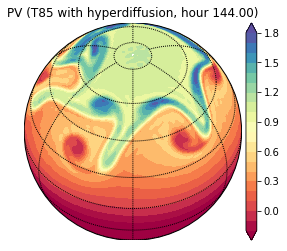

In [5]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap, addcyclic
    import time

    # shtns test

    # non-linear barotropically unstable shallow water test case
    # of Galewsky et al (2004, Tellus, 56A, 429-440).
    # "An initial-value problem for testing numerical models of the global
    # shallow-water equations"
    # http://www-vortex.mcs.st-and.ac.uk/~rks/reprints/galewsky_etal_tellus_2004.pdf

    # grid, time step info
    nlons = 256  # number of longitudes
    ntrunc = nlons/3  # spectral truncation (for alias-free computations)
    nlats = nlons/2 # for gaussian grid.
    dt = 150 # time step in seconds
    itmax = 6*(86400/dt) # integration length in days

    # parameters for test
    rsphere = 6.37122e6 # earth radius
    omega = 7.292e-5 # rotation rate
    grav = 9.80616 # gravity
    hbar = 10.e3 # resting depth
    umax = 80. # jet speed
    phi0 = np.pi/7.; phi1 = 0.5*np.pi - phi0; phi2 = 0.25*np.pi
    en = np.exp(-4.0/(phi1-phi0)**2)
    alpha = 1./3.; beta = 1./15.
    hamp = 120. # amplitude of height perturbation to zonal jet
    efold = 3.*3600. # efolding timescale at ntrunc for hyperdiffusion
    ndiss = 8 # order for hyperdiffusion

    # setup up spherical harmonic instance, set lats/lons of grid
    x = Spharmt(nlons,nlats,ntrunc,rsphere,gridtype='gaussian')
    lons,lats = np.meshgrid(x.lons, x.lats)
    f = 2.*omega*np.sin(lats) # coriolis

    # zonal jet.
    vg = np.zeros((nlats,nlons),np.float)
    u1 = (umax/en)*np.exp(1./((x.lats-phi0)*(x.lats-phi1)))
    ug = np.zeros((nlats),np.float)
    ug = np.where(np.logical_and(x.lats < phi1, x.lats > phi0), u1, ug)
    ug.shape = (nlats,1)
    ug = ug*np.ones((nlats,nlons),dtype=np.float) # broadcast to shape (nlats,nlons)
    # height perturbation.
    hbump = hamp*np.cos(lats)*np.exp(-(lons/alpha)**2)*np.exp(-(phi2-lats)**2/beta)

    # initial vorticity, divergence in spectral space
    vrtspec, divspec =  x.getvrtdivspec(ug,vg)
    vrtg = x.spectogrd(vrtspec)
    divg = x.spectogrd(divspec)

    # create spectral indexing arrays, laplacian operator and its inverse.
    hyperdiff_fact = np.exp((-dt/efold)*(x.lap/x.lap[-1])**(ndiss/2))

    # solve nonlinear balance eqn to get initial zonal geopotential,
    # add localized bump (not balanced).
    vrtg = x.spectogrd(vrtspec)
    tmpg1 = ug*(vrtg+f); tmpg2 = vg*(vrtg+f)
    tmpspec1, tmpspec2 = x.getvrtdivspec(tmpg1,tmpg2)
    tmpspec2 = x.grdtospec(0.5*(ug**2+vg**2))
    phispec = x.invlap*tmpspec1 - tmpspec2
    phig = grav*(hbar + hbump) + x.spectogrd(phispec)
    phispec = x.grdtospec(phig)

    # initialize spectral tendency arrays
    ddivdtspec = np.zeros(vrtspec.shape+(3,), np.complex)
    dvrtdtspec = np.zeros(vrtspec.shape+(3,), np.complex)
    dphidtspec = np.zeros(vrtspec.shape+(3,), np.complex)
    nnew = 0; nnow = 1; nold = 2

    # time loop.
    time1 = time.clock()
    for ncycle in range(itmax+1):
        t = ncycle*dt
        # get vort,u,v,phi on grid
        vrtg = x.spectogrd(vrtspec)
        ug,vg = x.getuv(vrtspec,divspec)
        phig = x.spectogrd(phispec)
        print 't=%6.2f hours: min/max %6.2f, %6.2f' % (t/3600.,vg.min(), vg.max())
        # compute tendencies.
        tmpg1 = ug*(vrtg+f); tmpg2 = vg*(vrtg+f)
        ddivdtspec[:,nnew], dvrtdtspec[:,nnew] = x.getvrtdivspec(tmpg1,tmpg2)
        dvrtdtspec[:,nnew] *= -1
        tmpg = x.spectogrd(ddivdtspec[:,nnew])
        tmpg1 = ug*phig; tmpg2 = vg*phig
        tmpspec, dphidtspec[:,nnew] = x.getvrtdivspec(tmpg1,tmpg2)
        dphidtspec[:,nnew] *= -1
        tmpspec = x.grdtospec(phig+0.5*(ug**2+vg**2))
        ddivdtspec[:,nnew] += -x.lap*tmpspec
        # update vort,div,phi with third-order adams-bashforth.
        # forward euler, then 2nd-order adams-bashforth time steps to start.
        if ncycle == 0:
            dvrtdtspec[:,nnow] = dvrtdtspec[:,nnew]
            dvrtdtspec[:,nold] = dvrtdtspec[:,nnew]
            ddivdtspec[:,nnow] = ddivdtspec[:,nnew]
            ddivdtspec[:,nold] = ddivdtspec[:,nnew]
            dphidtspec[:,nnow] = dphidtspec[:,nnew]
            dphidtspec[:,nold] = dphidtspec[:,nnew]
        elif ncycle == 1:
            dvrtdtspec[:,nold] = dvrtdtspec[:,nnew]
            ddivdtspec[:,nold] = ddivdtspec[:,nnew]
            dphidtspec[:,nold] = dphidtspec[:,nnew]
        vrtspec += dt*( \
        (23./12.)*dvrtdtspec[:,nnew] - (16./12.)*dvrtdtspec[:,nnow]+ \
        (5./12.)*dvrtdtspec[:,nold] )
        divspec += dt*( \
        (23./12.)*ddivdtspec[:,nnew] - (16./12.)*ddivdtspec[:,nnow]+ \
        (5./12.)*ddivdtspec[:,nold] )
        phispec += dt*( \
        (23./12.)*dphidtspec[:,nnew] - (16./12.)*dphidtspec[:,nnow]+ \
        (5./12.)*dphidtspec[:,nold] )
        # implicit hyperdiffusion for vort and div.
        vrtspec *= hyperdiff_fact
        divspec *= hyperdiff_fact
        # switch indices, do next time step.
        nsav1 = nnew; nsav2 = nnow
        nnew = nold; nnow = nsav1; nold = nsav2

    time2 = time.clock()
    print 'CPU time = ',time2-time1

    # make a orthographic plot of potential vorticity.
    m = Basemap(projection='ortho',lat_0=45,lon_0=0)
    # dimensionless PV
    pvg = (0.5*hbar*grav/omega)*(vrtg+f)/phig
    print 'max/min PV',pvg.min(), pvg.max()
    lons1d = (180./np.pi)*x.lons; lats1d = (180./np.pi)*x.lats
    pvg,lons1d = addcyclic(pvg,lons1d)
    lons, lats = np.meshgrid(lons1d,lats1d)
    x,y = m(lons,lats)
    levs = np.arange(-0.2,1.801,0.1)
    m.drawmeridians(np.arange(-180,180,60))
    m.drawparallels(np.arange(-80,81,20))
    CS=m.contourf(x,y,pvg,levs,cmap=plt.get_cmap('Spectral'),extend='both')
    m.colorbar()
    plt.title('PV (T%s with hyperdiffusion, hour %6.2f)' % (ntrunc,t/3600.))
    plt.show()

**Presented by:** Kalik Kumar Vishisth, Sumit kumar Mukherjee, Ajinkya M. Aswale